<a href="https://colab.research.google.com/github/pythagoras58/Quantizer/blob/main/MDI_QSS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U qiskit
!pip install qiskit-aer
!pip install pylatexenc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 89.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=753bc7eaf39d85f29b2b50106d8f1dd58e4f901d5d6e3cc98a0fbce2275eaa92
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [2]:
from qiskit import QuantumCircuit, QuantumRegister, transpile, assemble
from qiskit.visualization import circuit_drawer
from qiskit.visualization import plot_state_qsphere
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
from qiskit_aer import Aer
import matplotlib.pyplot as plt
import random
import numpy as np


**State Initialization stage - ALICE**

In [3]:
"""
# Step 1: Create the Bell state |ψ+> = (|01⟩ + |10⟩) / √2
qc = QuantumCircuit(2)

# Prepare |ψ+>
qc.h(0)          # Hadamard on qubit 0
qc.cx(0, 1)      # CNOT with control qubit 0, target qubit 1

# Step 2: Randomly apply one of the four unitary operations U_ab
# Define U_ab as separate functions for clarity
def U_00(qc):
    # U_00 = I (Identity operation, no change needed)
    pass

def U_01(qc):
    # U_01: Apply Z gate to qubit 0
    qc.z(0)

def U_10(qc):
    # U_10: Apply X gate to qubit 0
    qc.x(0)

def U_11(qc):
    # U_11: Apply X and Z (XZ) on qubit 0
    qc.x(0)
    qc.z(0)

# Randomly choose one of the four operations
operation = random.choice([U_00, U_01, U_10, U_11])
operation(qc)

# Step 3: Output circuit to see the configuration
qc.draw('mpl')
"""

"\n# Step 1: Create the Bell state |ψ+> = (|01⟩ + |10⟩) / √2\nqc = QuantumCircuit(2)\n\n# Prepare |ψ+>\nqc.h(0)          # Hadamard on qubit 0\nqc.cx(0, 1)      # CNOT with control qubit 0, target qubit 1\n\n# Step 2: Randomly apply one of the four unitary operations U_ab\n# Define U_ab as separate functions for clarity\ndef U_00(qc):\n    # U_00 = I (Identity operation, no change needed)\n    pass\n\ndef U_01(qc):\n    # U_01: Apply Z gate to qubit 0\n    qc.z(0)\n\ndef U_10(qc):\n    # U_10: Apply X gate to qubit 0\n    qc.x(0)\n\ndef U_11(qc):\n    # U_11: Apply X and Z (XZ) on qubit 0\n    qc.x(0)\n    qc.z(0)\n\n# Randomly choose one of the four operations\noperation = random.choice([U_00, U_01, U_10, U_11])\noperation(qc)\n\n# Step 3: Output circuit to see the configuration\nqc.draw('mpl')\n"

**# Step 1: Create the Bell state |ψ+> = (|01⟩ + |10⟩) / √2**

In [4]:

qc = QuantumCircuit(4)  # 4 qubits: 0-1 are Alice's, 2-3 are Bob's and Charlie's

# Prepare |ψ+> between qubits 0 and 1 (Alice's pair)
qc.h(0)
qc.cx(0, 1)

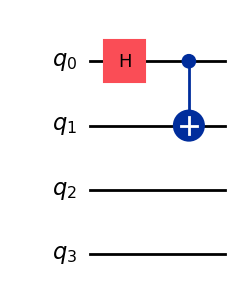

In [5]:
qc.draw('mpl')

# Step 2: Apply random U_ab operations for Alice, Bob, and **Charlie**

In [6]:
def apply_U_ab(qc, qubit, a, b):
    if a == 1:
        qc.x(qubit)  # Bit flip if a = 1
    if b == 1:
        qc.z(qubit)  # Phase flip if b = 1

# Alice applies a random U_ab on her qubits (qubits 0 and 1)
a_Alice, b_Alice = random.choice([(0, 0), (0, 1), (1, 0), (1, 1)])
apply_U_ab(qc, 0, a_Alice, b_Alice)

# Bob applies a random U_ab on his qubit (qubit 2)
a_Bob, b_Bob = random.choice([(0, 0), (0, 1), (1, 0), (1, 1)])
apply_U_ab(qc, 2, a_Bob, b_Bob)

# Charlie applies a random U_ab on his qubit (qubit 3)
a_Charlie, b_Charlie = random.choice([(0, 0), (0, 1), (1, 0), (1, 1)])
apply_U_ab(qc, 3, a_Charlie, b_Charlie)

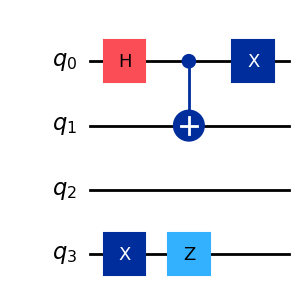

In [7]:
qc.draw('mpl')

**# Step 3: Bell-state measurement by David**
# To simulate Bell state analysis (BSA) for each pair, we perform a Bell basis measurement.

In [8]:
# Measure qubits 0 and 2 in the Bell basis
qc.cx(0, 2)
qc.h(0)

# Measure qubits 1 and 3 in the Bell basis
qc.cx(1, 3)
qc.h(1)

print("Circuit Before measurement")
qc.draw('mpl')

# Add measurement operations to all qubits
qc.measure_all()

print("Circuit After measurement")
qc.draw('mpl')

# Execute the circuit on a simulator
#simulator = Aer.get_backend('qasm_simulator')
simulator = AerSimulator()
transpiled_qc = transpile(qc, simulator)
result = simulator.run(transpiled_qc, shots=1024).result()
counts = result.get_counts(qc)

# Print the measurement results
print("Measurement Results:")
print(counts)
#result = execute(qc, backend=simulator, shots=1024).result()
#counts = result.get_counts(qc)

Circuit Before measurement
Circuit After measurement
Measurement Results:
{'1101': 134, '0011': 135, '0010': 142, '0000': 123, '1100': 126, '1110': 128, '0001': 107, '1111': 129}


In [9]:
# Modify all count results
def print_final_result(result):
    print("Final Result (Formatted):\n")
    for binary_key, value in result.items():
        print(f"Binary sequence: {binary_key}, Frequency: {value}")

In [10]:
print_final_result(counts)


Final Result (Formatted):

Binary sequence: 1101, Frequency: 134
Binary sequence: 0011, Frequency: 135
Binary sequence: 0010, Frequency: 142
Binary sequence: 0000, Frequency: 123
Binary sequence: 1100, Frequency: 126
Binary sequence: 1110, Frequency: 128
Binary sequence: 0001, Frequency: 107
Binary sequence: 1111, Frequency: 129


In [11]:
expected_results_table_I = {
    # Format: (a_B, b_B, a_C, b_C): Expected Bell State
    (0, 0, 0, 0): "psi+",
    (0, 0, 0, 1): "phi-",
    (0, 0, 1, 0): "psi-",
    (0, 0, 1, 1): "phi+",

    (0, 1, 0, 0): "psi-",
    (0, 1, 0, 1): "phi+",
    (0, 1, 1, 0): "psi+",
    (0, 1, 1, 1): "phi-",

    (1, 0, 0, 0): "phi+",
    (1, 0, 0, 1): "psi-",
    (1, 0, 1, 0): "phi-",
    (1, 0, 1, 1): "psi+",

    (1, 1, 0, 0): "phi-",
    (1, 1, 0, 1): "psi+",
    (1, 1, 1, 0): "phi+",
    (1, 1, 1, 1): "psi-"
}

expected_results_table_II = {
    # Format: (a_B, b_B, a_C, b_C): Expected Bell State
    (0, 0, 0, 0): "phi+",
    (0, 0, 0, 1): "psi-",
    (0, 0, 1, 0): "phi-",
    (0, 0, 1, 1): "psi+",

    (0, 1, 0, 0): "phi-",
    (0, 1, 0, 1): "psi+",
    (0, 1, 1, 0): "phi+",
    (0, 1, 1, 1): "psi-",

    (1, 0, 0, 0): "psi+",
    (1, 0, 0, 1): "phi-",
    (1, 0, 1, 0): "psi-",
    (1, 0, 1, 1): "phi+",

    (1, 1, 0, 0): "psi-",
    (1, 1, 0, 1): "phi+",
    (1, 1, 1, 0): "psi+",
    (1, 1, 1, 1): "phi-"
}

# Mapping from measurement result to Bell state outcome
measurement_to_bell = {
    "00": "psi+",  # Measurement outcome "00" -> |ψ+>
    "01": "psi-",  # Measurement outcome "01" -> |ψ->
    "10": "phi+",  # Measurement outcome "10" -> |φ+>
    "11": "phi-"   # Measurement outcome "11" -> |φ->
}

In [12]:
def check_correlation(result_key, a_B, b_B, a_C, b_C, table_choice="I"):
    """
    Checks if the measurement result matches the expected Bell state
    based on the operations performed by Bob and Charlie.

    Parameters:
    - result_key: the measured outcome from the BSA (e.g., '00', '01', '10', '11').
    - a_B, b_B: operations applied by Bob
    - a_C, b_C: operations applied by Charlie
    - table_choice: "I" or "II", selects the expected results table.

    Returns:
    - True if the result matches the expected Bell state, False otherwise.
    """
    # Choose the correct expected results table based on the protocol step
    if table_choice == "I":
        expected_results = expected_results_table_I
    elif table_choice == "II":
        expected_results = expected_results_table_II
    else:
        raise ValueError("table_choice must be 'I' or 'II'")

    # Lookup the expected Bell state for the given operations (a_B, b_B, a_C, b_C)
    expected_bell_state = expected_results.get((a_B, b_B, a_C, b_C))

    # Determine the actual Bell state from the measurement result
    measured_bell_state = measurement_to_bell.get(result_key[:2])  # Only use the first 2 bits of result

    # Return True if they match, False otherwise
    return measured_bell_state == expected_bell_state

**# Step 4: Post-Processing for Error Detection**

In [13]:
"""
# Simulate Alice's random selection of a subset of results for error checking
sample_size = int(0.1 * len(counts))  # Use 10% of data as a sample
sample_keys = random.sample(list(counts.keys()), sample_size)

# Define a threshold error rate
error_threshold = 0.1

# Example values for operations performed by Bob and Charlie
a_B, b_B, a_C, b_C = 0, 0, 1, 0  # Replace with actual values
table_choice = "I"  # Choose based on which table you are using

# Count the number of mismatches in the sample
mismatches = 0
for key in sample_keys:
    # For each sampled result, check if it matches expected correlations
    # Example: check_correlation() returns True if correlations match, False otherwise
    if not check_correlation(key, a_B, b_B, a_C, b_C, table_choice):
        mismatches += 1

# Calculate error rate
error_rate = mismatches / sample_size

# Print error rate and determine if protocol continues
print(f"Error rate in sample: {error_rate:.2%}")
if error_rate > error_threshold:
    print("Error rate exceeds threshold. Protocol terminated due to potential eavesdropping.")
else:
    print("Error rate is within acceptable limits. Protocol proceeds to the next step.")

# Optional: Display the histogram of all measurement outcomes
plot_histogram(counts)
"""

'\n# Simulate Alice\'s random selection of a subset of results for error checking\nsample_size = int(0.1 * len(counts))  # Use 10% of data as a sample\nsample_keys = random.sample(list(counts.keys()), sample_size)\n\n# Define a threshold error rate\nerror_threshold = 0.1\n\n# Example values for operations performed by Bob and Charlie\na_B, b_B, a_C, b_C = 0, 0, 1, 0  # Replace with actual values\ntable_choice = "I"  # Choose based on which table you are using\n\n# Count the number of mismatches in the sample\nmismatches = 0\nfor key in sample_keys:\n    # For each sampled result, check if it matches expected correlations\n    # Example: check_correlation() returns True if correlations match, False otherwise\n    if not check_correlation(key, a_B, b_B, a_C, b_C, table_choice):\n        mismatches += 1\n\n# Calculate error rate\nerror_rate = mismatches / sample_size\n\n# Print error rate and determine if protocol continues\nprint(f"Error rate in sample: {error_rate:.2%}")\nif error_rate 

Error rate in sample: 52.94%
Error rate exceeds threshold. Protocol terminated due to potential eavesdropping.


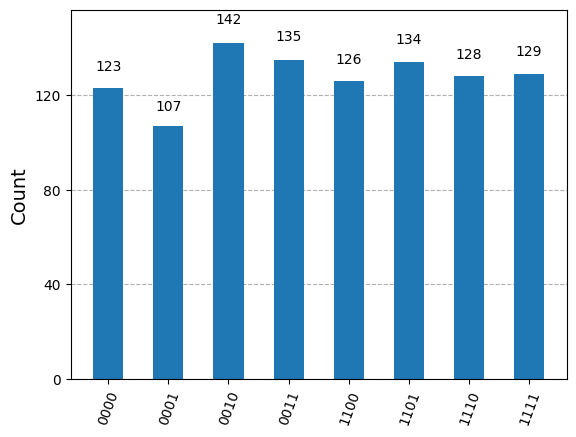

In [14]:
# Parameters for error checking
error_threshold = 0.1  # Example threshold (10%)
#a_B, b_B, a_C, b_C = 0, 0, 1, 0
a_B, b_B, a_C, b_C = 0, 1, 1, 0  # Example operations by Bob and Charlie
table_choice = "I"  # Use Table I for this example

# Sample 10% of the total measurement counts for error checking
total_samples = sum(counts.values())
sample_size = int(0.1 * total_samples)  # 10% of total outcomes

# Flattened list of results according to their frequencies
flat_counts = [outcome for outcome, freq in counts.items() for _ in range(freq)]
sampled_outcomes = random.sample(flat_counts, sample_size)  # Random sample of outcomes based on counts


# Count mismatches in the sample
mismatches = sum(
    1 for outcome in sampled_outcomes if not check_correlation(outcome, a_B, b_B, a_C, b_C, table_choice)
)

# Calculate the error rate
error_rate = mismatches / sample_size

# Print error rate and determine if protocol continues
print(f"Error rate in sample: {error_rate:.2%}")
if error_rate > error_threshold:
    print("Error rate exceeds threshold. Protocol terminated due to potential eavesdropping.")
else:
    print("Error rate is within acceptable limits. Protocol proceeds to the next step.")

# Optional: Display the histogram of all measurement outcomes
plot_histogram(counts)